# ARIMA and SARIMA on Monthly Champagne Price Data

### Function to Check Stationarity Using Augmented Dickey-Fuller Test:

In [1]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller_result(series):
    """
    Function To Perform Augmenter Dickey-Fuller Test and Display Results.
    """
    
    result= adfuller(series.dropna())
    
    labels = ["Test Statistics", "p-Value", "No. of Lags", "No. of Observations"]
    
    output = pd.Series(result[0:4], index= labels)
    
    for key,value in result[4].items():
        output[f"Critical Value {key}"] = value
        
    print(output)
    
    print("\n")
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [2]:
import numpy as np
import pandas as pd

from pmdarima import auto_arima

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

from sklearn.metrics import mean_squared_error

In [3]:
df= pd.read_csv("monthly-champagne-sales.csv", index_col= 0, parse_dates= True)

In [4]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [5]:
df.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [6]:
df.index.freq = "MS"

In [7]:
df.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq='MS')

<AxesSubplot:xlabel='Month'>

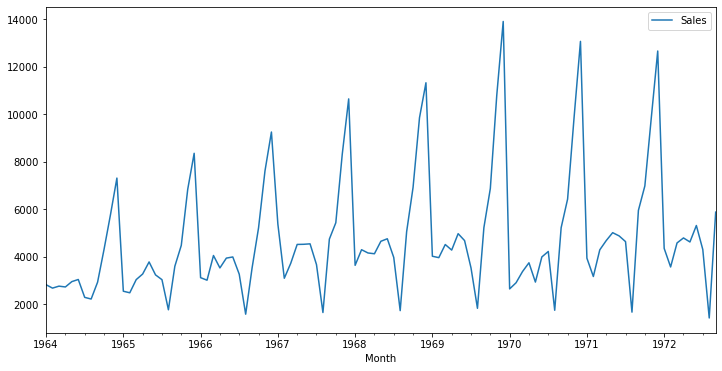

In [8]:
# Plotting Data:

df.plot(figsize= (12,6))

### ETS Decomposition:

In [10]:
decomp = seasonal_decompose(df["Sales"], model= "additive")

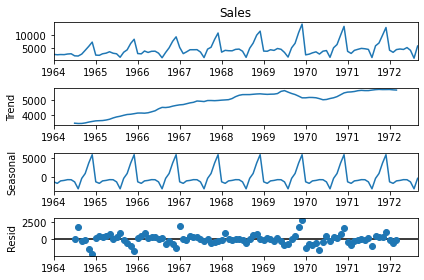

In [11]:
decomp.plot();

### Stationarity Check:

In [12]:
dickey_fuller_result(df["Sales"])

Test Statistics        -1.833593
p-Value                 0.363916
No. of Lags            11.000000
No. of Observations    93.000000
Critical Value 1%      -3.502705
Critical Value 5%      -2.893158
Critical Value 10%     -2.583637
dtype: float64


Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [75]:
# Series is Non-Stationary.

# We have to apply Differencing.

In [13]:
df["diff_1"] = diff(df["Sales"], k_diff= 1)

In [14]:
df.head()

,Sales,diff_1
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,-143.0
1964-03-01,2755,83.0
1964-04-01,2721,-34.0
1964-05-01,2946,225.0


In [15]:
# Checking Stationarity of First Order Differenced Data:

dickey_fuller_result(df["diff_1"])

Test Statistics       -7.189896e+00
p-Value                2.519620e-10
No. of Lags            1.100000e+01
No. of Observations    9.200000e+01
Critical Value 1%     -3.503515e+00
Critical Value 5%     -2.893508e+00
Critical Value 10%    -2.583824e+00
dtype: float64


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### ACF and PACF Plots:

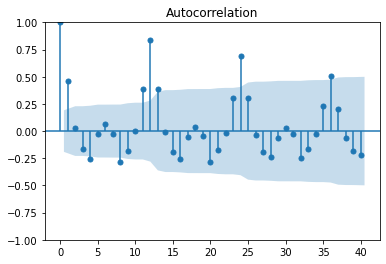

In [16]:
plot_acf(df["Sales"], lags= 40);

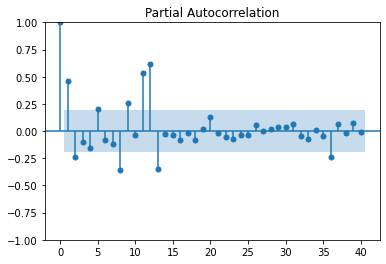

In [17]:
plot_pacf(df["Sales"], lags= 40, method= "ywm");

### Using Auto ARIMA to Decide Orders:

In [18]:
grid_arima = auto_arima(df["Sales"], seasonal= True, m= 12, trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1505.396, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1500.884, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1498.757, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1498.942, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1511.271, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1499.959, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1499.625, Time=0.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1500.741, Time=0.15 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1499.028, Time=0.07 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1501.490, Time=0.30 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1500.866, Time=0.13 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1500.295, Time=0.25 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1500.747, Time=0.11 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1498.167, Time=0.30 sec
 ARIMA(0,0,1)(0,1,0

In [19]:
grid_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -745.083
Date:                             Thu, 24 Nov 2022   AIC                           1498.167
Time:                                     17:27:15   BIC                           1508.297
Sample:                                 01-01-1964   HQIC                          1502.257
                                      - 09-01-1972                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    362.8397    100.620      3.606      0.000     165.628     560.051
ma.L1          0.2191      0.074      2.970      0.003       0.075       0.364
ar.S.L12      -0.1784      0.082     -2.186      0.029      -0.338      -0.018
sigma2      5.135e+05   5.75e+04      8.924      0.000    4.01e+05    6.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 8.20
Prob(Q):                              0.55   Prob(JB):                         0.02
Heteroskedasticity (H):               1.27   Skew:                            -0.15
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# So, (p,d,q) = (0,0,1) for ARIMA
# (P,D,Q,m) = (1,1,0,12) for SARIMA

### Train Test Split:

In [21]:
len(df)

105

In [22]:
train_data = df[:84]
test_data = df[84:]

In [23]:
train_data.shape

(84, 2)

In [24]:
test_data.shape

(21, 2)

### 1) ARIMA(0,0,1) Model:

In [25]:
arima_model = ARIMA(train_data["Sales"], order= (0,0,1))

In [26]:
arima_result = arima_model.fit()

In [27]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   84
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -763.208
Date:                Thu, 24 Nov 2022   AIC                           1532.417
Time:                        17:29:16   BIC                           1539.709
Sample:                    01-01-1964   HQIC                          1535.348
                         - 12-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4689.6233    432.207     10.850      0.000    3842.512    5536.734
ma.L1          0.6881      0.076      9.012      0.000       0.538       0.838
sigma2      4.528e+06   6.73e+05      6.724      0.000    3.21e+06    5.85e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.78
Prob(Q):                              0.92   Prob(JB):                         0.09
Heteroskedasticity (H):               3.79   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Predictions on Test Data:

start = len(train_data)
end = len(train_data) + len(test_data) -1

arima_pred = arima_result.predict(start= start, end= end, typ= "levels")

In [29]:
arima_pred

1971-01-01    8133.058095
1971-02-01    4689.623320
1971-03-01    4689.623320
1971-04-01    4689.623320
1971-05-01    4689.623320
1971-06-01    4689.623320
1971-07-01    4689.623320
1971-08-01    4689.623320
1971-09-01    4689.623320
1971-10-01    4689.623320
1971-11-01    4689.623320
1971-12-01    4689.623320
1972-01-01    4689.623320
1972-02-01    4689.623320
1972-03-01    4689.623320
1972-04-01    4689.623320
1972-05-01    4689.623320
1972-06-01    4689.623320
1972-07-01    4689.623320
1972-08-01    4689.623320
1972-09-01    4689.623320
Freq: MS, Name: predicted_mean, dtype: float64

In [30]:
test_data["Sales"]

Month
1971-01-01     3934
1971-02-01     3162
1971-03-01     4286
1971-04-01     4676
1971-05-01     5010
1971-06-01     4874
1971-07-01     4633
1971-08-01     1659
1971-09-01     5951
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
1972-01-01     4348
1972-02-01     3564
1972-03-01     4577
1972-04-01     4788
1972-05-01     4618
1972-06-01     5312
1972-07-01     4298
1972-08-01     1413
1972-09-01     5877
Freq: MS, Name: Sales, dtype: int64

<AxesSubplot:xlabel='Month'>

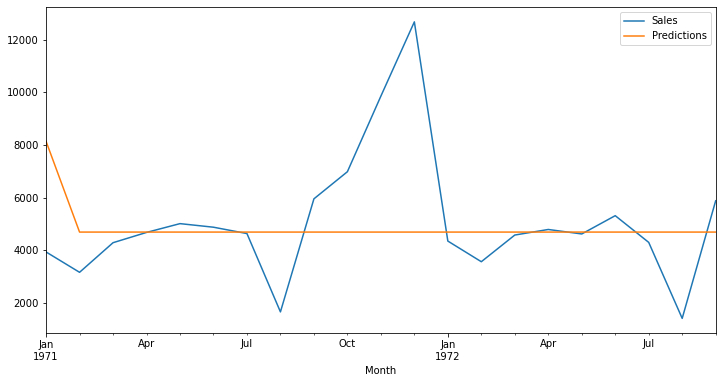

In [31]:
# Plotting Test Data and Predictions:

test_data["Sales"].plot(figsize= (12,6), legend= True)
arima_pred.plot(label= "Predictions", legend= True)

In [32]:
# Model Evaluation:

np.sqrt(mean_squared_error(test_data["Sales"], arima_pred))

2588.611598139835

In [33]:
# Training Model and Full Data and Making Predictions for Future:

final_arima = ARIMA(df["Sales"], order= (0,0,1))

In [34]:
arima_result = final_arima.fit()

In [35]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -956.359
Date:                Thu, 24 Nov 2022   AIC                           1918.718
Time:                        17:30:20   BIC                           1926.680
Sample:                    01-01-1964   HQIC                          1921.944
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4763.1298    383.114     12.433      0.000    4012.241    5514.019
ma.L1          0.6411      0.071      9.054      0.000       0.502       0.780
sigma2      4.749e+06    6.5e+05      7.304      0.000    3.47e+06    6.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 5.46
Prob(Q):                              0.71   Prob(JB):                         0.07
Heteroskedasticity (H):               3.65   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# Forecasting:

forecast_arima = arima_result.predict(start= len(df), end= len(df)+23, typ= "levels")

In [37]:
forecast_arima

1972-10-01    6584.040999
1972-11-01    4763.129782
1972-12-01    4763.129782
1973-01-01    4763.129782
1973-02-01    4763.129782
1973-03-01    4763.129782
1973-04-01    4763.129782
1973-05-01    4763.129782
1973-06-01    4763.129782
1973-07-01    4763.129782
1973-08-01    4763.129782
1973-09-01    4763.129782
1973-10-01    4763.129782
1973-11-01    4763.129782
1973-12-01    4763.129782
1974-01-01    4763.129782
1974-02-01    4763.129782
1974-03-01    4763.129782
1974-04-01    4763.129782
1974-05-01    4763.129782
1974-06-01    4763.129782
1974-07-01    4763.129782
1974-08-01    4763.129782
1974-09-01    4763.129782
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

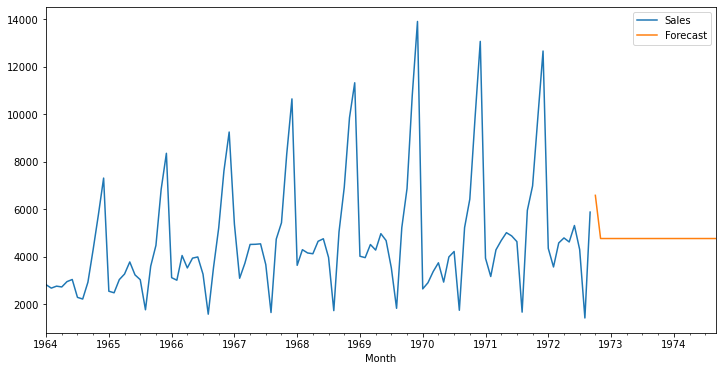

In [38]:
# Plotting Historic and Forecast Data:

df["Sales"].plot(figsize= (12,6), legend= True)
forecast_arima.plot(label= "Forecast", legend= True)

### 1) SARIMA(0,0,1)(1,1,0,12) Model:

In [40]:
sarima_model = SARIMAX(train_data["Sales"], order= (0,0,1), seasonal_order= (1,1,0,12))

In [41]:
sarima_result = sarima_model.fit()

In [42]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   84
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -584.198
Date:                             Thu, 24 Nov 2022   AIC                           1174.396
Time:                                     17:31:42   BIC                           1181.226
Sample:                                 01-01-1964   HQIC                          1177.115
                                      - 12-01-1970                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1780      0.102      1.753      0.080      -0.021       0.377
ar.S.L12       0.0752      0.113      0.665      0.506      -0.147       0.297
sigma2      6.932e+05   9.99e+04      6.937      0.000    4.97e+05    8.89e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.84
Prob(Q):                              0.98   Prob(JB):                         0.03
Heteroskedasticity (H):               2.68   Skew:                            -0.25
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# Predictions on Test Data:

start = len(train_data)
end = len(train_data) + len(test_data) -1

sarima_pred = sarima_result.predict(start= start, end= end, typ= "levels")

In [44]:
sarima_pred

1971-01-01     2381.495329
1971-02-01     2819.418836
1971-03-01     3284.250919
1971-04-01     3699.682888
1971-05-01     2773.479058
1971-06-01     3934.024022
1971-07-01     4269.201633
1971-08-01     1731.756865
1971-09-01     5220.924782
1971-10-01     6390.302116
1971-11-01     9769.715029
1971-12-01    13012.816467
1972-01-01     2362.126216
1972-02-01     2813.432860
1972-03-01     3277.801003
1972-04-01     3696.650296
1972-05-01     2761.931444
1972-06-01     3930.114467
1972-07-01     4273.128161
1972-08-01     1731.287266
1972-09-01     5220.919124
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

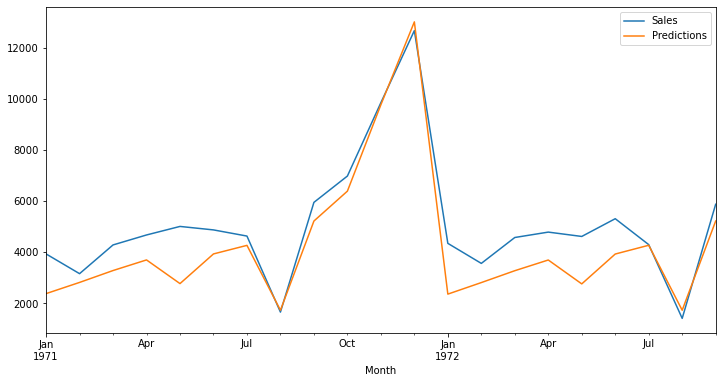

In [45]:
# Plotting Test Data and Predictions:

test_data["Sales"].plot(figsize= (12,6), legend= True)
sarima_pred.plot(label= "Predictions", legend= True)

In [47]:
# Model Evaluation:

np.sqrt(mean_squared_error(test_data["Sales"], sarima_pred))

1086.4224874247361

In [48]:
# Training Model and Full Data and Making Predictions for Future:

final_sarima = SARIMAX(df["Sales"], order= (0,0,1), seasonal_order= (1,1,0,12))

In [49]:
sarima_result = final_sarima.fit()

In [50]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  105
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -751.083
Date:                             Thu, 24 Nov 2022   AIC                           1508.166
Time:                                     17:32:45   BIC                           1515.764
Sample:                                 01-01-1964   HQIC                          1511.234
                                      - 09-01-1972                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2624      0.082      3.217      0.001       0.103       0.422
ar.S.L12      -0.0595      0.079     -0.749      0.454      -0.215       0.096
sigma2      5.936e+05   7.07e+04      8.401      0.000    4.55e+05    7.32e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                11.02
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.20
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# Forecasting:

forecast_sarima = sarima_result.predict(start= len(df), end= len(df)+11, typ= "levels")

In [52]:
forecast_sarima

1972-10-01     6948.796166
1972-11-01     9850.464325
1972-12-01    12694.164881
1973-01-01     4323.358964
1973-02-01     3540.073197
1973-03-01     4559.679852
1973-04-01     4781.333826
1973-05-01     4641.331609
1973-06-01     5285.930498
1973-07-01     4317.939003
1973-08-01     1427.641775
1973-09-01     5881.404436
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

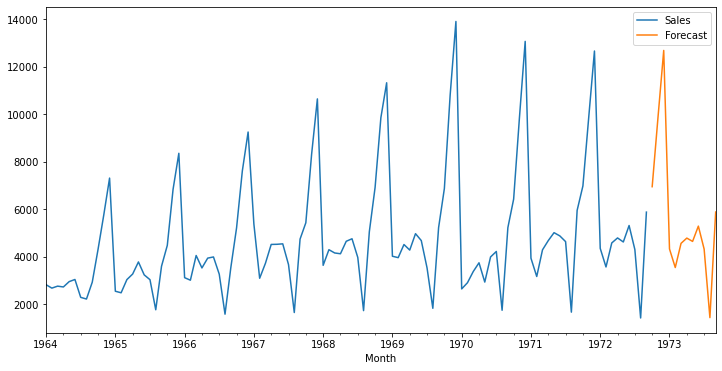

In [53]:
# Plotting Historic and Forecast Data:

df["Sales"].plot(figsize= (12,6), legend= True)
forecast_sarima.plot(label= "Forecast", legend= True)

### Comparing Predictions and Forecast of ARIMA and SARIMA:

<AxesSubplot:xlabel='Month'>

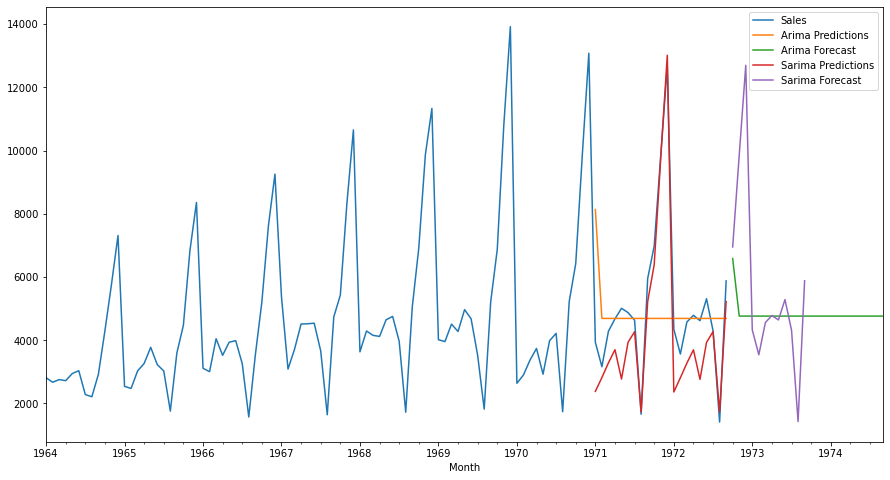

In [54]:
df["Sales"].plot(figsize= (15,8), legend= True)

arima_pred.plot(label= "Arima Predictions", legend= True)
forecast_arima.plot(label= "Arima Forecast", legend= True)

sarima_pred.plot(label= "Sarima Predictions", legend= True)
forecast_sarima.plot(label= "Sarima Forecast", legend= True)